In [1]:
#Imported the needed libraries for analysis
import warnings 
warnings.filterwarnings ('ignore')

import seaborn as sns
import re
import os 
import gzip 
from collections import Counter 
from pprint import pprint

import pandas as pd 
import numpy as np
import tweepy
import csv
import seaborn as sb

import matplotlib 
import matplotlib.pyplot as plt

np.random.seed(123)

import string 
import nltk
from nltk.corpus import stopwords 
from nltk.text import TextCollection 
from nltk.collocations import BigramCollocationFinder 
from nltk.metrics.association import BigramAssocMeasures
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 
from nltk.text import TextCollection 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

import gensim
from gensim import models
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.corpora import Dictionary


import sklearn 
from sklearn.manifold import TSNE 
from sklearn.metrics.pairwise import cosine_similarity

from tqdm.notebook import tqdm

import watermark

%load_ext watermark

%matplotlib inline

# Data Gathering

In this section, we focused on using tweepy to scrape tweeets from twitter.
10,000 tweets per candidate on the 18th of November, 2022.


In [2]:
consumer_key = '************'
consumer_secret = '************'
access_token = '************'
access_secret = '************'


In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)


In [4]:
# assign header columns
header = ['Time', 'Text']

In [5]:
# Open/Create a file to append data
csvFile = open('Peter_Obi.csv', 'a')

# open CSV file and assign header
with open("Peter_Obi.csv", 'w') as file:
    dw = csv.DictWriter(file, delimiter=',', 
                        fieldnames=header)
    dw.writeheader()
  

In [6]:
#Use csv Writer
csvWriter = csv.writer(csvFile)

In [7]:
tweets=[]
for tweet in tweepy.Cursor(api.search_tweets,q="Peter Obi",
                           lang="en",
                           since_id="2022-11-18").items(12000):
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])
    tweets.append(tweet)

print("Total tweets fetched:", len(tweets))


Rate limit reached. Sleeping for: 843
Rate limit reached. Sleeping for: 844
Rate limit reached. Sleeping for: 864
Rate limit reached. Sleeping for: 843


Total tweets fetched: 12000


In [8]:
# Open/Create a file to append data
csvFile = open('Asiwaju_Tinubu.csv', 'a')

# open CSV file and assign header
with open("Asiwaju_Tinubu.csv", 'w') as file:
    dw = csv.DictWriter(file, delimiter=',', 
                        fieldnames=header)
    dw.writeheader()
  

In [9]:
#Use csv Writer
csvWriter = csv.writer(csvFile)

In [11]:
tweets=[]
for tweet in tweepy.Cursor(api.search_tweets,q="Bola Ahmed Tinubu",
                           lang="en",
                           since_id="2022-11-18").items(12000):
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])
    tweets.append(tweet)

print("Total tweets fetched:", len(tweets))


Rate limit reached. Sleeping for: 848
Rate limit reached. Sleeping for: 846
Rate limit reached. Sleeping for: 847
Rate limit reached. Sleeping for: 847


Total tweets fetched: 12000


In [12]:
# Open/Create a file to append data
csvFile = open('Atiku_Abubakar.csv', 'a')

# open CSV file and assign header
with open("Atiku_Abubakar.csv", 'w') as file:
    dw = csv.DictWriter(file, delimiter=',', 
                        fieldnames=header)
    dw.writeheader()
  

In [13]:
#Use csv Writer
csvWriter = csv.writer(csvFile)

In [14]:
tweets=[]
for tweet in tweepy.Cursor(api.search_tweets,q="Atiku Abubakar",
                           lang="en",
                           since_id="2022-11-18").items(12000):
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])
    tweets.append(tweet)

print("Total tweets fetched:", len(tweets))


Rate limit reached. Sleeping for: 333
Rate limit reached. Sleeping for: 846
Rate limit reached. Sleeping for: 848
Rate limit reached. Sleeping for: 849


Total tweets fetched: 12000


# Data Cleaning

In [2]:
peter_df=pd.read_csv("Peter_Obi.csv")

In [3]:
peter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    12000 non-null  object
 1   Text    12000 non-null  object
dtypes: object(2)
memory usage: 187.6+ KB


In [4]:
peter_df.head()

,Time,Text
0,2022-11-19 23:33:57+00:00,b'RT @VictorIsrael_: \xf0\x9f\x98\x82\xf0\x9f\...
1,2022-11-19 23:33:50+00:00,b'Need Peter Obi to go head and get that dub i...
2,2022-11-19 23:33:44+00:00,"b'RT @VictorIsrael_: Obidients in Oyo state, a..."
3,2022-11-19 23:33:41+00:00,"b""80% of the people supporting Mr. Peter Obi t..."
4,2022-11-19 23:33:41+00:00,"b""RT @IamOsuofia: Peter Obi and Yusuf Datti. \..."


In [5]:
sum(peter_df.duplicated())

74

In [6]:
#drop the duplicate present
peter_df.drop_duplicates(inplace=True)

In [7]:
peter_df=peter_df.drop('Time', axis=1)

In [8]:
peter_df['ID'] = range(1, len(peter_df) + 1)
peter_df=peter_df.reindex(['ID','Text'], axis=1)

In [9]:
peter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11926 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      11926 non-null  int64 
 1   Text    11926 non-null  object
dtypes: int64(1), object(1)
memory usage: 279.5+ KB


In [10]:
tinubu_df=pd.read_csv("Asiwaju_Tinubu.csv")

In [11]:
tinubu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20591 entries, 0 to 20590
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    20591 non-null  object
 1   Text    20591 non-null  object
dtypes: object(2)
memory usage: 321.9+ KB


In [12]:
tinubu_df.head()

,Time,Text
0,2022-11-20 00:35:02+00:00,"b""RT @DavidHundeyin: If you enjoyed the @WestA..."
1,2022-11-20 00:34:26+00:00,"b""RT @DavidHundeyin: If you enjoyed the @WestA..."
2,2022-11-20 00:34:08+00:00,"b""RT @DavidHundeyin: If you enjoyed the @WestA..."
3,2022-11-20 00:33:36+00:00,"b""RT @DavidHundeyin: If you enjoyed the @WestA..."
4,2022-11-20 00:33:29+00:00,b'RT @royaltyuso: I had said months before tha...


In [13]:
sum(tinubu_df.duplicated())

8719

In [14]:
#drop the duplicate present
tinubu_df.drop_duplicates(inplace=True)

In [15]:
tinubu_df=tinubu_df.drop('Time', axis=1)

In [16]:
tinubu_df['ID'] = range(1, len(tinubu_df) + 1)
tinubu_df=tinubu_df.reindex(['ID','Text'], axis=1)

In [17]:
tinubu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11872 entries, 0 to 20590
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      11872 non-null  int64 
 1   Text    11872 non-null  object
dtypes: int64(1), object(1)
memory usage: 278.2+ KB


In [18]:
atiku_df=pd.read_csv("Atiku_Abubakar.csv")

In [19]:
atiku_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    12000 non-null  object
 1   Text    12000 non-null  object
dtypes: object(2)
memory usage: 187.6+ KB


In [20]:
atiku_df.head()

,Time,Text
0,2022-11-20 02:57:40+00:00,b'RT @firstladyship: These are Atiku Abubakar\...
1,2022-11-20 02:56:09+00:00,b'RT @Shehusky: How did Atiku Abubakar made hi...
2,2022-11-20 02:47:44+00:00,b'RT @Tamuno_Jorge: If you were to choose a de...
3,2022-11-20 02:44:00+00:00,b'RT @TheAfricaReport: With about 100 days to ...
4,2022-11-20 02:41:58+00:00,b'RT @channelstv: APC presidential candidate B...


In [21]:
sum(atiku_df.duplicated())

54

In [22]:
#drop the duplicate present
atiku_df.drop_duplicates(inplace=True)

In [23]:
atiku_df=atiku_df.drop('Time', axis=1)

In [24]:
atiku_df['ID'] = range(1, len(atiku_df) + 1)
atiku_df=atiku_df.reindex(['ID','Text'], axis=1)

In [25]:
atiku_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11946 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      11946 non-null  int64 
 1   Text    11946 non-null  object
dtypes: int64(1), object(1)
memory usage: 280.0+ KB


In [26]:
clean_tweets=peter_df['Text']
peter_df['Clean_Tweets']=clean_tweets

In [27]:
#convert the text in the Text column to lowercase
peter_df['Clean_Tweets'] = peter_df['Clean_Tweets'].str.lower()

#remove usernames
peter_df['Clean_Tweets'] = peter_df['Clean_Tweets'].str.replace('@[\w]+','', regex=True)

peter_df['Clean_Tweets'] = peter_df['Clean_Tweets'].str.replace('b\'rt\s','', regex=True)

peter_df['Clean_Tweets'] = peter_df['Clean_Tweets'].str.replace('b\"rt\s','', regex=True)

peter_df['Clean_Tweets'] = peter_df['Clean_Tweets'].str.replace('\n','', regex=True)

peter_df['Clean_Tweets'] = peter_df['Clean_Tweets'].str.replace('\n','', regex=True)

#remove non-alphanumeric characters
peter_df['Clean_Tweets'] = peter_df['Clean_Tweets'].str.replace('[^a-z0-9]',' ', regex=True)

#remove links
peter_df['Clean_Tweets'] = peter_df['Clean_Tweets'].str.replace('http\S+','', regex=True)

peter_df['Clean_Tweets'] = peter_df['Clean_Tweets'].str.replace('www.\S+','', regex=True)

#remove hashtags
peter_df['Clean_Tweets'] = peter_df['Clean_Tweets'].str.replace('#[A-Za-z0-9_]','', regex=True)

#remove multiple spaces
peter_df['Clean_Tweets'] = peter_df['Clean_Tweets'].str.replace('\s+',' ', regex=True)

#remove single characters
peter_df['Clean_Tweets'] = peter_df['Clean_Tweets'].str.replace('\b[a-z]{1,2}\b', '', regex=True)

#remove digits
peter_df['Clean_Tweets'] = peter_df['Clean_Tweets'].str.replace('\d+','', regex=True)

peter_df = peter_df[peter_df["Clean_Tweets"].str.contains("xx|xf") == False]


In [29]:
peter_df.head()

,ID,Text,Clean_Tweets
2,3,"b'RT @VictorIsrael_: Obidients in Oyo state, a...",obidients in oyo state are you ready for pete...
3,4,"b""80% of the people supporting Mr. Peter Obi t...",b of the people supporting mr peter obi today...
4,5,"b""RT @IamOsuofia: Peter Obi and Yusuf Datti. \...",peter obi and yusuf datti n ndon t say anythi...
5,6,b'RT @Makavelli275: Listen to Peter Obi\xe2\x8...,listen to peter obi xe x xs successor willie ...
6,7,"b""@TakeBackNaija_ We don't want OBEDIENT anymo...",b we don t want obedient anymore for the fact ...


In [30]:
peter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10625 entries, 2 to 11999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            10625 non-null  int64 
 1   Text          10625 non-null  object
 2   Clean_Tweets  10625 non-null  object
dtypes: int64(1), object(2)
memory usage: 332.0+ KB


In [31]:
clean_tweets=tinubu_df['Text']
tinubu_df['Clean_Tweets']=clean_tweets

In [32]:
#convert the text in the Text column to lowercase
tinubu_df['Clean_Tweets'] = tinubu_df['Clean_Tweets'].str.lower()

#remove usernames
tinubu_df['Clean_Tweets'] = tinubu_df['Clean_Tweets'].str.replace('@[\w]+','', regex=True)

tinubu_df['Clean_Tweets'] = tinubu_df['Clean_Tweets'].str.replace('b\'rt\s','', regex=True)

tinubu_df['Clean_Tweets'] = tinubu_df['Clean_Tweets'].str.replace('b\"rt\s','', regex=True)

tinubu_df['Clean_Tweets'] = tinubu_df['Clean_Tweets'].str.replace('\n','', regex=True)

tinubu_df['Clean_Tweets'] = tinubu_df['Clean_Tweets'].str.replace('\n','', regex=True)

#remove non-alphanumeric characters
tinubu_df['Clean_Tweets'] = tinubu_df['Clean_Tweets'].str.replace('[^a-z0-9]',' ', regex=True)

#remove links
tinubu_df['Clean_Tweets'] = tinubu_df['Clean_Tweets'].str.replace('http\S+','', regex=True)

tinubu_df['Clean_Tweets'] = tinubu_df['Clean_Tweets'].str.replace('www.\S+','', regex=True)

#remove hashtags
tinubu_df['Clean_Tweets'] = tinubu_df['Clean_Tweets'].str.replace('#[A-Za-z0-9_]','', regex=True)

#remove multiple spaces
tinubu_df['Clean_Tweets'] = tinubu_df['Clean_Tweets'].str.replace('\s+',' ', regex=True)

#remove single characters
tinubu_df['Clean_Tweets'] = tinubu_df['Clean_Tweets'].str.replace('~\b[a-z]{1,2}\b\s*~',' ', regex=True)

#remove digits
tinubu_df['Clean_Tweets'] = tinubu_df['Clean_Tweets'].str.replace('\d+','', regex=True)

tinubu_df = tinubu_df[tinubu_df["Clean_Tweets"].str.contains("xx|xf") == False]


In [33]:
tinubu_df.tail()

,ID,Text,Clean_Tweets
20586,11868,"b""RT @DavidHundeyin: For those who still haven...",for those who still haven t read it this is t...
20587,11869,"b'RT @DavidHundeyin: 1: The gender of the ""Bol...",the gender of the bola a tinubu who was admi...
20588,11870,b'RT @AkwariCharles: If you know any of Bola A...,if you know any of bola ahmed tinubu xe x xs ...
20589,11871,b'RT @AkwariCharles: If you know any of Bola A...,if you know any of bola ahmed tinubu xe x xs ...
20590,11872,b'RT @Naija_Activist: Bola Ahmed Tinubu is a f...,bola ahmed tinubu is a female according to th...


In [34]:
tinubu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11336 entries, 0 to 20590
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            11336 non-null  int64 
 1   Text          11336 non-null  object
 2   Clean_Tweets  11336 non-null  object
dtypes: int64(1), object(2)
memory usage: 354.2+ KB


In [35]:
clean_tweets=atiku_df['Text']
atiku_df['Clean_Tweets']=clean_tweets

In [36]:
#convert the text in the Text column to lowercase
atiku_df['Clean_Tweets'] = atiku_df['Clean_Tweets'].str.lower()

#remove usernames
atiku_df['Clean_Tweets'] = atiku_df['Clean_Tweets'].str.replace('@[\w]+','', regex=True)

atiku_df['Clean_Tweets'] = atiku_df['Clean_Tweets'].str.replace('b\'rt\s','', regex=True)

atiku_df['Clean_Tweets'] = atiku_df['Clean_Tweets'].str.replace('b\"rt\s','', regex=True)

atiku_df['Clean_Tweets'] = atiku_df['Clean_Tweets'].str.replace('\n','', regex=True)

atiku_df['Clean_Tweets'] = atiku_df['Clean_Tweets'].str.replace('\t','', regex=True)

#remove non-alphanumeric characters
atiku_df['Clean_Tweets'] = atiku_df['Clean_Tweets'].str.replace('[^a-z0-9]',' ', regex=True)

#remove links
atiku_df['Clean_Tweets'] = atiku_df['Clean_Tweets'].str.replace('http\S+','', regex=True)

atiku_df['Clean_Tweets'] = atiku_df['Clean_Tweets'].str.replace('www.\S+','', regex=True)

#remove hashtags
atiku_df['Clean_Tweets'] = atiku_df['Clean_Tweets'].str.replace('#[A-Za-z0-9_]','', regex=True)

#remove multiple spaces
atiku_df['Clean_Tweets'] = atiku_df['Clean_Tweets'].str.replace('\s+',' ', regex=True)

#remove single characters
atiku_df['Clean_Tweets'] = atiku_df['Clean_Tweets'].str.replace('~\b[a-z]{1,2}\b\s*~',' ', regex=True)

#remove digits
atiku_df['Clean_Tweets'] = atiku_df['Clean_Tweets'].str.replace('\d+','', regex=True)

atiku_df = atiku_df[atiku_df["Clean_Tweets"].str.contains("xx|xf") == False]


In [37]:
atiku_df.head()

,ID,Text,Clean_Tweets
0,1,b'RT @firstladyship: These are Atiku Abubakar\...,these are atiku abubakar xe x xs soldiers amp...
1,2,b'RT @Shehusky: How did Atiku Abubakar made hi...,how did atiku abubakar made his money from cu...
2,3,b'RT @Tamuno_Jorge: If you were to choose a de...,if you were to choose a deserved candidate fo...
3,4,b'RT @TheAfricaReport: With about 100 days to ...,with about days to the poll lagos godfather ...
4,5,b'RT @channelstv: APC presidential candidate B...,apc presidential candidate bola tinubu accuse...


In [38]:
#tokenize the text in Clean_Tweets columnn and store in a new column called tweet_tokens
def apwords(words):
    filtered_sentence = []
    words = word_tokenize(words)
    for w in words:
        filtered_sentence.append(w)
    return filtered_sentence
addwords = lambda x: apwords(x)

In [39]:
peter_df['Tweet_tokens'] = peter_df['Clean_Tweets'].apply(addwords)

In [40]:
tinubu_df['Tweet_tokens'] = tinubu_df['Clean_Tweets'].apply(addwords)

In [41]:
atiku_df['Tweet_tokens'] = atiku_df['Clean_Tweets'].apply(addwords)

In [42]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [43]:
#remove stopwords from token_list and store in a new column called 'no_stop_tokens'

peter_df['no_stop_tokens']= peter_df['Tweet_tokens'].apply(lambda x: [item for item in x if item not in stop])
tinubu_df['no_stop_tokens']= tinubu_df['Tweet_tokens'].apply(lambda x: [item for item in x if item not in stop])
atiku_df['no_stop_tokens']= atiku_df['Tweet_tokens'].apply(lambda x: [item for item in x if item not in stop])


In [44]:
# initializing the lemmatizer
lemmatizer = WordNetLemmatizer()

In [45]:
def lemmatize(text):
    return lemmatizer.lemmatize(text, pos = "v")

In [46]:
#function to lemmatize text
def preprocess(text):
    result = []
    for word in gensim.utils.simple_preprocess(text):
        if word not in gensim.parsing.preprocessing.STOPWORDS and len(word) > 2:
            l = lemmatize(word)
            if len(l) > 2:
                result.append(l)
    return result

In [47]:
peter_tweets= peter_df['Clean_Tweets'].map(preprocess)
tinubu_tweets= tinubu_df['Clean_Tweets'].map(preprocess)
atiku_tweets= atiku_df['Clean_Tweets'].map(preprocess)

In [48]:
merged_tweets=[]
merged_tweets.extend(peter_tweets)
merged_tweets.extend(tinubu_tweets)
merged_tweets.extend(atiku_tweets)

In [49]:
len(merged_tweets)

33322

In [50]:
corpus = TextCollection(merged_tweets)

In [51]:
#calculating the TFIDF of the preprocessed text stored in headlines
TFIDF = []

for tweet in merged_tweets:
    score = {}
    
    for token in set(tweet):
        score[token] = corpus.tf_idf(token, tweet)
        
    TFIDF.append(score)

In [53]:
word_list = list(corpus.vocab().keys()) 
word_dict = dict(zip(word_list, np.arange(len(word_list))))

In [54]:
#printing the size of the text list
vocabulary_size = len(word_dict)
print("We have", vocabulary_size, "words in our vocabulary")

We have 7311 words in our vocabulary


In [55]:
word_list[:5]

['obidients', 'oyo', 'state', 'ready', 'peter']

In [56]:
def term_document_matrix(TFIDF, word_list, word_dict):
    vocabulary_size = len(word_dict) 
    number_documents = len(TFIDF)
    
    TDM = np.zeros((vocabulary_size, number_documents))
    
    for doc in range(number_documents):
        document = TFIDF[doc]
        
        for word in document.keys():
            pos = word_dict[word]
            
            TDM[pos, doc] = document[word]
            
    return TDM

In [57]:
TDM = term_document_matrix(TFIDF, word_list, word_dict) 
print("Our dataset has:\n%u unique words\n%u documents"%(TDM. shape))

Our dataset has:
7311 unique words
33322 documents


In [58]:
#calling the SentimentIntensityAnalyzer into sentiment

sentiment = SentimentIntensityAnalyzer()

In [59]:
peter_df=peter_df.head(10000)

In [60]:
tinubu_df=tinubu_df.head(10000)

In [61]:
atiku_df=atiku_df.head(10000)

In [62]:
#Using sentiment process the no_stop_tokens column to get the neg, neu, pos and compound scores

peter_result = {}
for i, row in tqdm(peter_df.iterrows(),total=len(peter_df)):
    text=row['Clean_Tweets']
    myid=row['ID']
    peter_result[myid]=sentiment.polarity_scores(text)
    

  0%|          | 0/10000 [00:00<?, ?it/s]

In [63]:
#append the results from sentiment analysis to peter_df

peter_result_df=pd.DataFrame(peter_result).T
peter_result_df=peter_result_df.reset_index().rename(columns={'index':'ID'})
peter_df=peter_df.merge(peter_result_df)

In [64]:
#Using sentiment process the no_stop_tokens column to get the neg, neu, pos and compound scores

tinubu_result = {}
for i, row in tqdm(tinubu_df.iterrows(),total=len(tinubu_df)):
    text=row['Clean_Tweets']
    myid=row['ID']
    tinubu_result[myid]=sentiment.polarity_scores(text)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [65]:
#append the results from sentiment analysis to tinubu_df

tinubu_result_df=pd.DataFrame(tinubu_result).T
tinubu_result_df=tinubu_result_df.reset_index().rename(columns={'index':'ID'})
tinubu_df=tinubu_df.merge(tinubu_result_df)

In [66]:
#Using sentiment process the no_stop_tokens column to get the neg, neu, pos and compound scores

atiku_result = {}
for i, row in tqdm(atiku_df.iterrows(),total=len(atiku_df)):
    text=row['Clean_Tweets']
    myid=row['ID']
    atiku_result[myid]=sentiment.polarity_scores(text)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [67]:
#append the results from sentiment analysis to atiku_df

atiku_result_df=pd.DataFrame(atiku_result).T
atiku_result_df=atiku_result_df.reset_index().rename(columns={'index':'ID'})
atiku_df=atiku_df.merge(atiku_result_df)

In [68]:
# specify positive and negative compound scores for each review

peter_df.loc[peter_df['compound'] > 0, 'comp_score'] = 'positive'
peter_df.loc[peter_df['compound'] < 0, 'comp_score'] = 'negative'
peter_df.loc[peter_df['compound'] == 0, 'comp_score'] = 'neutral'

tinubu_df.loc[tinubu_df['compound'] > 0, 'comp_score'] = 'positive'
tinubu_df.loc[tinubu_df['compound'] < 0, 'comp_score'] = 'negative'
tinubu_df.loc[tinubu_df['compound'] == 0, 'comp_score'] = 'neutral'

atiku_df.loc[atiku_df['compound'] > 0, 'comp_score'] = 'positive'
atiku_df.loc[atiku_df['compound'] < 0, 'comp_score'] = 'negative'
atiku_df.loc[atiku_df['compound'] == 0, 'comp_score'] = 'neutral'


In [69]:
peter_df.comp_score.value_counts()

positive    3927
neutral     3380
negative    2693
Name: comp_score, dtype: int64

In [70]:
tinubu_df.comp_score.value_counts()

positive    4746
neutral     3627
negative    1627
Name: comp_score, dtype: int64

In [71]:
atiku_df.comp_score.value_counts()

positive    4098
negative    3127
neutral     2775
Name: comp_score, dtype: int64

In [72]:
pc=peter_df.comp_score.value_counts()
tc=tinubu_df.comp_score.value_counts()
ac=atiku_df.comp_score.value_counts()


In [73]:
#function to plot a piechart
#labels= ['neutral','negative','positive']
def myPiePlot(data,name):

    #set plot dimensions
    plt.figure(figsize=[20,10])
    

    plt.pie(data, labels = data.index, startangle = 0,
        counterclock = False, autopct='%1.2f%%');

    
    #plt.axis('square')
    #plt.title('Percentage distribution of Sentiment of tweets for {data}', fontsize=15);

    
    #Add title 
    plt.title(f'''Percentage distribution of Sentiment of tweets for {name}'''.title() , fontsize=20 , weight='bold')
    

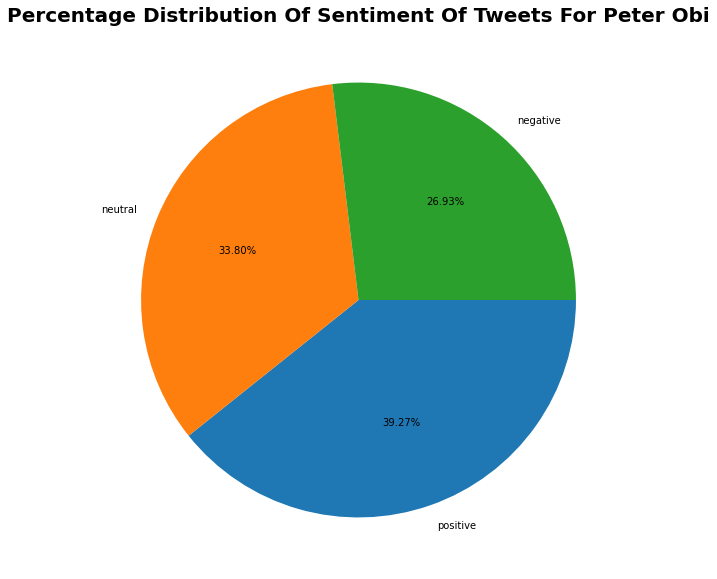

In [74]:
myPiePlot(pc,'Peter Obi')

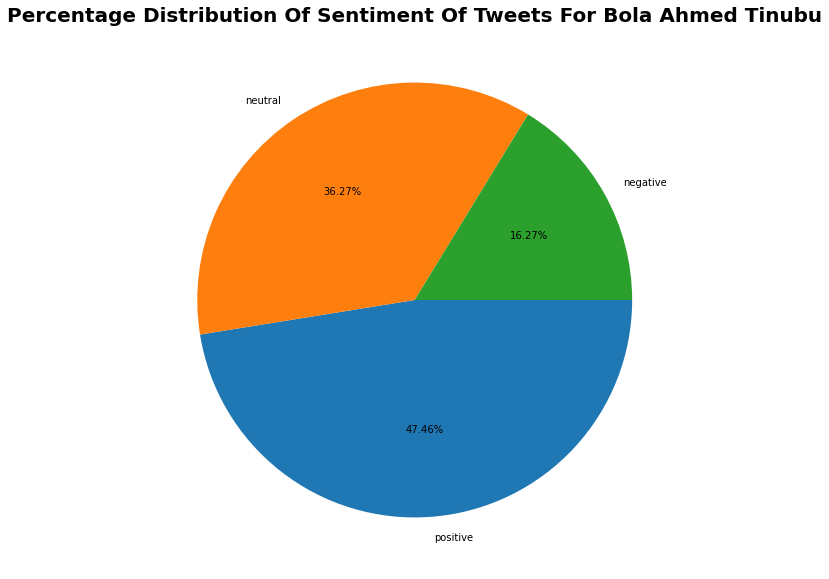

In [75]:
myPiePlot(tc,'Bola Ahmed Tinubu')

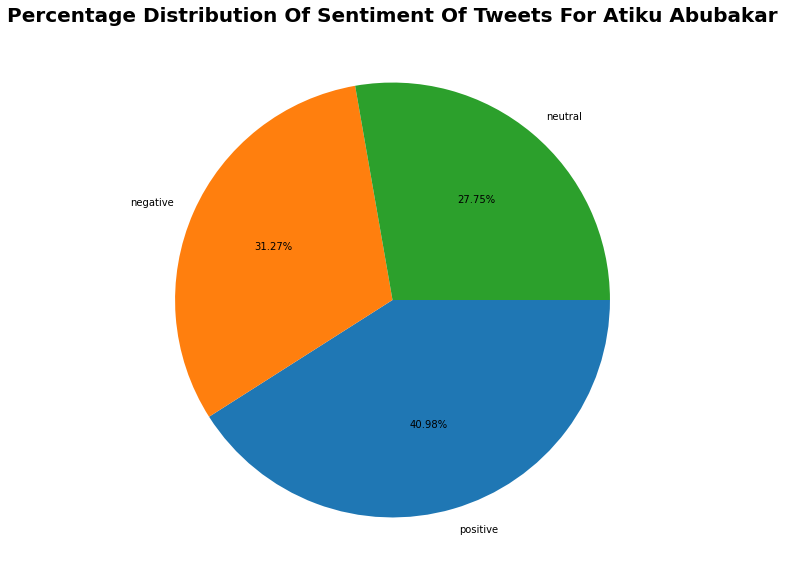

In [76]:
myPiePlot(ac,'Atiku Abubakar')

In [77]:
def find_pol(review):
    return TextBlob(review).sentiment.polarity



In [78]:
peter_df['TextBlob_Sentiment_Polarity'] = peter_df['Clean_Tweets'].apply(find_pol)
tinubu_df['TextBlob_Sentiment_Polarity'] = tinubu_df['Clean_Tweets'].apply(find_pol)
atiku_df['TextBlob_Sentiment_Polarity'] = atiku_df['Clean_Tweets'].apply(find_pol)


In [79]:
# specify positive and negative compound scores for each review

peter_df.loc[peter_df['TextBlob_Sentiment_Polarity'] > 0, 'TextBlob_Sentiment'] = 'positive'
peter_df.loc[peter_df['TextBlob_Sentiment_Polarity'] < 0, 'TextBlob_Sentiment'] = 'negative'
peter_df.loc[peter_df['TextBlob_Sentiment_Polarity'] == 0, 'TextBlob_Sentiment'] = 'neutral'

tinubu_df.loc[tinubu_df['TextBlob_Sentiment_Polarity'] > 0, 'TextBlob_Sentiment'] = 'positive'
tinubu_df.loc[tinubu_df['TextBlob_Sentiment_Polarity'] < 0, 'TextBlob_Sentiment'] = 'negative'
tinubu_df.loc[tinubu_df['TextBlob_Sentiment_Polarity'] == 0, 'TextBlob_Sentiment'] = 'neutral'

atiku_df.loc[atiku_df['TextBlob_Sentiment_Polarity'] > 0, 'TextBlob_Sentiment'] = 'positive'
atiku_df.loc[atiku_df['TextBlob_Sentiment_Polarity'] < 0, 'TextBlob_Sentiment'] = 'negative'
atiku_df.loc[atiku_df['TextBlob_Sentiment_Polarity'] == 0, 'TextBlob_Sentiment'] = 'neutral'


In [80]:
peter_df.head()

,ID,Text,Clean_Tweets,Tweet_tokens,no_stop_tokens,neg,neu,pos,compound,comp_score,TextBlob_Sentiment_Polarity,TextBlob_Sentiment
0,3,"b'RT @VictorIsrael_: Obidients in Oyo state, a...",obidients in oyo state are you ready for pete...,"[obidients, in, oyo, state, are, you, ready, f...","[obidients, oyo, state, ready, peter, obi, yus...",0.082,0.824,0.094,0.0772,positive,0.200,positive
1,4,"b""80% of the people supporting Mr. Peter Obi t...",b of the people supporting mr peter obi today...,"[b, of, the, people, supporting, mr, peter, ob...","[b, people, supporting, mr, peter, obi, today,...",0.000,0.781,0.219,0.7089,positive,0.125,positive
2,5,"b""RT @IamOsuofia: Peter Obi and Yusuf Datti. \...",peter obi and yusuf datti n ndon t say anythi...,"[peter, obi, and, yusuf, datti, n, ndon, t, sa...","[peter, obi, yusuf, datti, n, ndon, say, anyth...",0.000,1.000,0.000,0.0000,neutral,0.000,neutral
3,6,b'RT @Makavelli275: Listen to Peter Obi\xe2\x8...,listen to peter obi xe x xs successor willie ...,"[listen, to, peter, obi, xe, x, xs, successor,...","[listen, peter, obi, xe, x, xs, successor, wil...",0.189,0.653,0.158,-0.2263,negative,0.000,neutral
4,7,"b""@TakeBackNaija_ We don't want OBEDIENT anymo...",b we don t want obedient anymore for the fact ...,"[b, we, don, t, want, obedient, anymore, for, ...","[b, want, obedient, anymore, fact, peter, obi,...",0.000,0.942,0.058,0.0772,positive,0.400,positive


In [81]:
tinubu_df.head()

,ID,Text,Clean_Tweets,Tweet_tokens,no_stop_tokens,neg,neu,pos,compound,comp_score,TextBlob_Sentiment_Polarity,TextBlob_Sentiment
0,1,"b""RT @DavidHundeyin: If you enjoyed the @WestA...",if you enjoyed the documentary bola ahmed tin...,"[if, you, enjoyed, the, documentary, bola, ahm...","[enjoyed, documentary, bola, ahmed, tinubu, dr...",0.000,0.845,0.155,0.5106,positive,0.250000,positive
1,2,"b""RT @DavidHundeyin: If you enjoyed the @WestA...",if you enjoyed the documentary bola ahmed tin...,"[if, you, enjoyed, the, documentary, bola, ahm...","[enjoyed, documentary, bola, ahmed, tinubu, dr...",0.000,0.845,0.155,0.5106,positive,0.250000,positive
2,3,"b""RT @DavidHundeyin: If you enjoyed the @WestA...",if you enjoyed the documentary bola ahmed tin...,"[if, you, enjoyed, the, documentary, bola, ahm...","[enjoyed, documentary, bola, ahmed, tinubu, dr...",0.000,0.845,0.155,0.5106,positive,0.250000,positive
3,4,"b""RT @DavidHundeyin: If you enjoyed the @WestA...",if you enjoyed the documentary bola ahmed tin...,"[if, you, enjoyed, the, documentary, bola, ahm...","[enjoyed, documentary, bola, ahmed, tinubu, dr...",0.000,0.845,0.155,0.5106,positive,0.250000,positive
4,5,b'RT @royaltyuso: I had said months before tha...,i had said months before that bola ahmed tinu...,"[i, had, said, months, before, that, bola, ahm...","[said, months, bola, ahmed, tinubu, given, soc...",0.114,0.749,0.137,0.1779,positive,0.111111,positive


In [82]:
atiku_df.head()

,ID,Text,Clean_Tweets,Tweet_tokens,no_stop_tokens,neg,neu,pos,compound,comp_score,TextBlob_Sentiment_Polarity,TextBlob_Sentiment
0,1,b'RT @firstladyship: These are Atiku Abubakar\...,these are atiku abubakar xe x xs soldiers amp...,"[these, are, atiku, abubakar, xe, x, xs, soldi...","[atiku, abubakar, xe, x, xs, soldiers, amp, on...",0.129,0.871,0.000,-0.4767,negative,-0.4,negative
1,2,b'RT @Shehusky: How did Atiku Abubakar made hi...,how did atiku abubakar made his money from cu...,"[how, did, atiku, abubakar, made, his, money, ...","[atiku, abubakar, made, money, customs, servic...",0.000,1.000,0.000,0.0000,neutral,0.0,neutral
2,3,b'RT @Tamuno_Jorge: If you were to choose a de...,if you were to choose a deserved candidate fo...,"[if, you, were, to, choose, a, deserved, candi...","[choose, deserved, candidate, presidency, choi...",0.000,1.000,0.000,0.0000,neutral,0.0,neutral
3,4,b'RT @TheAfricaReport: With about 100 days to ...,with about days to the poll lagos godfather ...,"[with, about, days, to, the, poll, lagos, godf...","[days, poll, lagos, godfather, bola, tinubu, f...",0.000,0.876,0.124,0.4019,positive,0.0,neutral
4,5,b'RT @channelstv: APC presidential candidate B...,apc presidential candidate bola tinubu accuse...,"[apc, presidential, candidate, bola, tinubu, a...","[apc, presidential, candidate, bola, tinubu, a...",0.197,0.803,0.000,-0.5994,negative,0.0,neutral


In [83]:
peter_df.TextBlob_Sentiment.value_counts()

neutral     4340
positive    3766
negative    1894
Name: TextBlob_Sentiment, dtype: int64

In [84]:
tinubu_df.TextBlob_Sentiment.value_counts()

neutral     5211
positive    3568
negative    1221
Name: TextBlob_Sentiment, dtype: int64

In [85]:
atiku_df.TextBlob_Sentiment.value_counts()

neutral     5172
positive    2608
negative    2220
Name: TextBlob_Sentiment, dtype: int64

In [86]:
pt=peter_df.TextBlob_Sentiment.value_counts(sort=False)
tt=tinubu_df.TextBlob_Sentiment.value_counts(sort=False)
at=atiku_df.TextBlob_Sentiment.value_counts(sort=False)

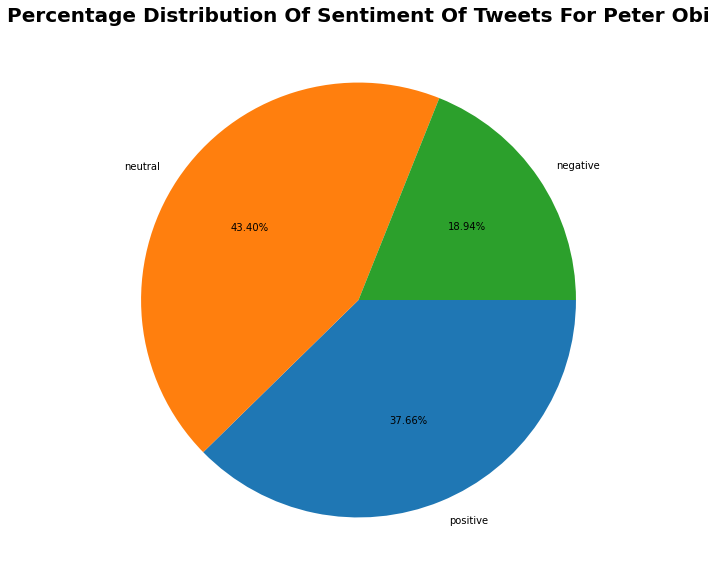

In [87]:
myPiePlot(pt,'Peter Obi')

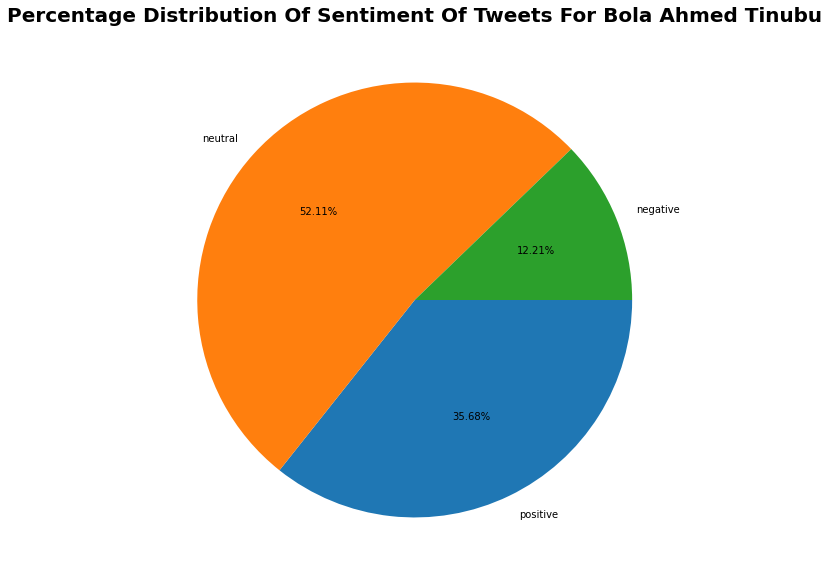

In [88]:
myPiePlot(tt,'Bola Ahmed Tinubu')

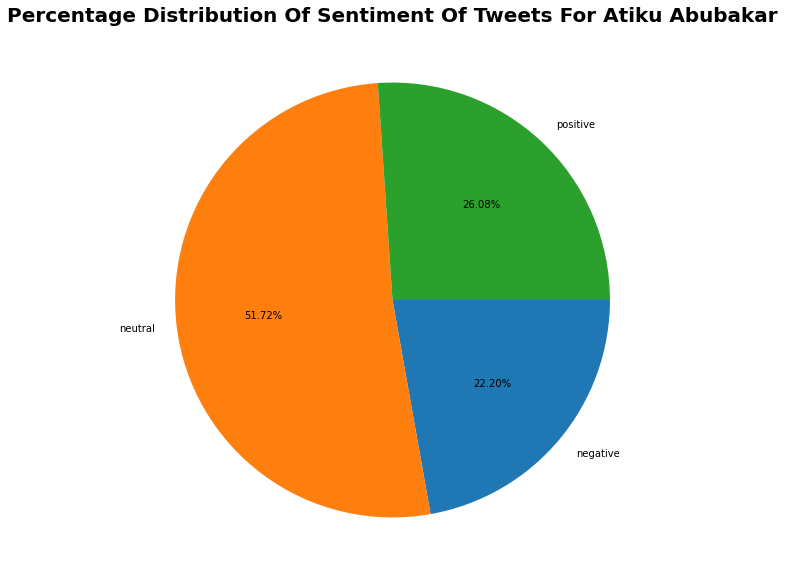

In [89]:
myPiePlot(at,'Atiku Abubakar')

In [90]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [91]:
Peter_Tweets=peter_df['Clean_Tweets']
Peter_Tweets= ",".join(str(x) for x in Peter_Tweets)

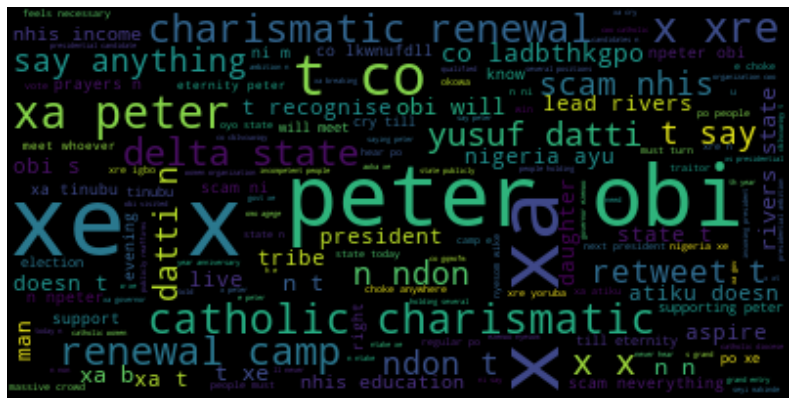

In [92]:
# Start with one review:
text = Peter_Tweets

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=200).generate(text)

# Display the generated image:
plt.figure(figsize=[14,8])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [93]:
Tinubu_Tweets=tinubu_df['Clean_Tweets']
Tinubu_Tweets= ",".join(str(x) for x in Tinubu_Tweets)

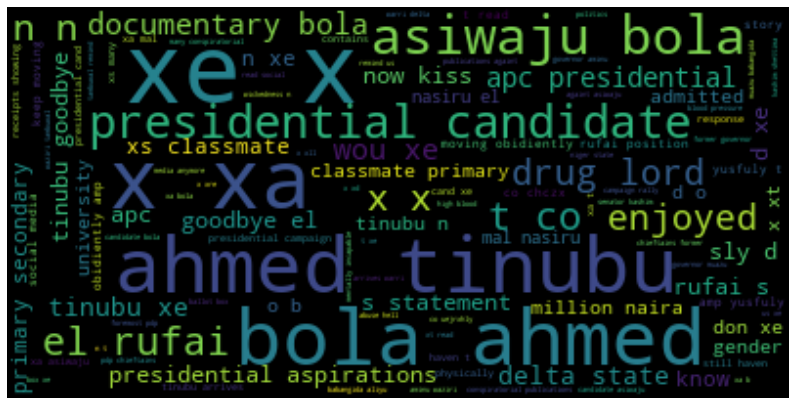

In [94]:
# Start with one review:
text = Tinubu_Tweets

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=200).generate(text)

# Display the generated image:
plt.figure(figsize=[14,8])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [95]:
Atiku_Tweets=atiku_df['Clean_Tweets']
Atiku_Tweets= ",".join(str(x) for x in Atiku_Tweets)

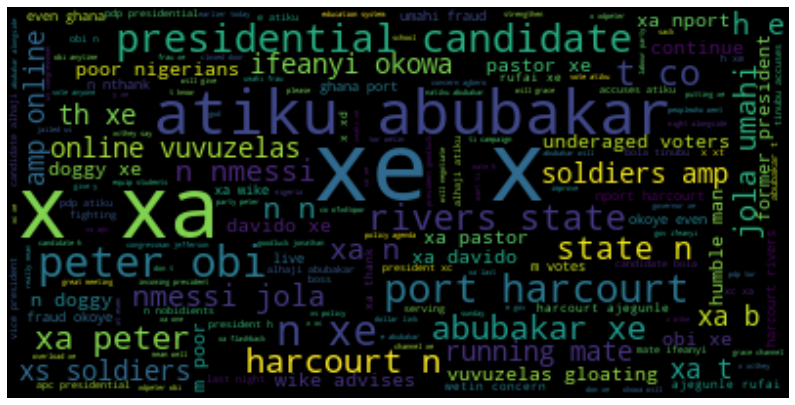

In [96]:
# Start with one review:
text = Atiku_Tweets

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=200).generate(text)

# Display the generated image:
plt.figure(figsize=[14,8])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



In [98]:
merged_tweets= ",".join(str(x) for x in merged_tweets)

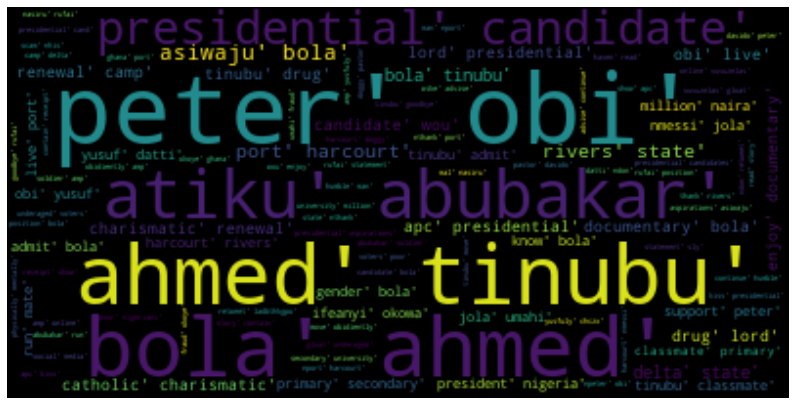

In [99]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=200).generate(merged_tweets)

# Display the generated image:
plt.figure(figsize=[14,8])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
